In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
((X_train, Y_train), (X_test, Y_test)) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
Y_train[0].shape

(1,)

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
Y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [ ]:
Y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
model.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy'])
h = model.fit(X_train,Y_train, epochs=10, validation_data=(X_test,Y_test),batch_size=128)

Epoch 1/10
391/391 [==============================] - 59s 149ms/step - loss: 2.2240 - accuracy: 0.1684 - val_loss: 2.0776 - val_accuracy: 0.2646
Epoch 2/10
391/391 [==============================] - 64s 164ms/step - loss: 1.9931 - accuracy: 0.2833 - val_loss: 1.9675 - val_accuracy: 0.3016
Epoch 3/10
391/391 [==============================] - 58s 147ms/step - loss: 1.8775 - accuracy: 0.3356 - val_loss: 1.8406 - val_accuracy: 0.3517
Epoch 4/10
391/391 [==============================] - 60s 153ms/step - loss: 1.7500 - accuracy: 0.3825 - val_loss: 1.7063 - val_accuracy: 0.3849
Epoch 5/10
391/391 [==============================] - 63s 160ms/step - loss: 1.6288 - accuracy: 0.4193 - val_loss: 1.6425 - val_accuracy: 0.4187
Epoch 6/10
391/391 [==============================] - 60s 153ms/step - loss: 1.5536 - accuracy: 0.4442 - val_loss: 1.5248 - val_accuracy: 0.4537
Epoch 7/10
391/391 [==============================] - 58s 149ms/step - loss: 1.5010 - accuracy: 0.4638 - val_loss: 1.6657 - val_ac

In [ ]:
epochs = 10

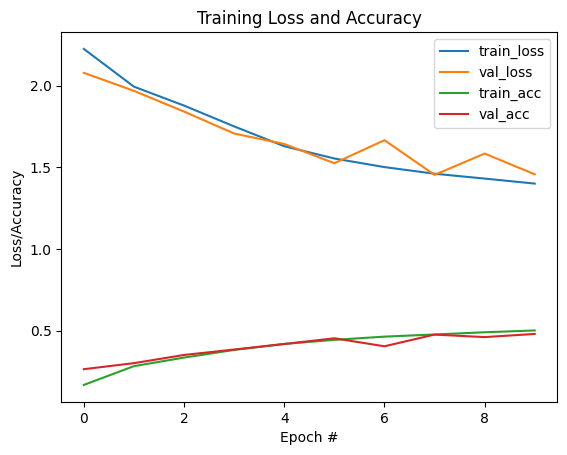

In [ ]:
plt.figure()
plt.plot(np.arange(0, 10), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()